In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
dataset = pd.read_csv('data/boston_housing.csv').values

In [129]:
X = dataset[:,:-1]
y = dataset[:,-1]
print(X.shape)
print(y.shape)
print(X.ndim)
print(y.ndim)

(506, 13)
(506,)
2
1


In [130]:
# K-fold cross validation
from sklearn.model_selection import KFold
k = 5
kf = KFold(k)

In [131]:
kf.split(X,y)

<generator object _BaseKFold.split at 0x285b73820>

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 3: model의 수 (simple, multiple, polynomial)
# k: the number of validation
mae = np.zeros((3,k))
mse = np.zeros((3,k))
r2 = np.zeros((3,k))

In [133]:
# kf.split(X,y) 확인
cnt = 1
for train_idx, test_idx in kf.split(X,y):
    print('count :', cnt)
    print('*train: ', train_idx)
    print('*test: ', test_idx)
    cnt += 1

count : 1
*train:  [102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341 342 343

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pos_poly = PolynomialFeatures(degree = 2)

pLR = LinearRegression()
sLR = LinearRegression()
mLR = LinearRegression()
iter = 0

for train_idx, test_idx in kf.split(X,y):
    X_train = X[train_idx,:]
    X_test = X[test_idx,:]
    y_train = y[train_idx]
    y_test = y[test_idx]
    
    # 1. learning simple linear regression
    sLR.fit(X_train[:,6:7],y_train) # Age열만 추출
    # 1-1. prediction
    y_pred_sLR = sLR.predict(X_test[:,6:7])
    
    # 2. learning multiple linear regression
    mLR.fit(X_train, y_train)
    
    # 2-1 prediction
    y_pred_mLR = mLR.predict(X_test)
    
    # 3. Polynomial
    X_poly = pos_poly.fit(X_train[:,[5,6,12]])
    pLR.fit(pos_poly.transform(X_train[:,[5,6,12]]),y_train)
    y_pred_pLR = pLR.predict(pos_poly.transform(X_test[:,[5,6,12]]))
    
    # 3. metrics
    # 3-1) MAE
    mae[0,iter] = mean_absolute_error(y_test,y_pred_sLR) # index = 0: simple
    mae[1,iter] = mean_absolute_error(y_test,y_pred_mLR) # index = 1: multiple
    mae[2,iter] = mean_absolute_error(y_test,y_pred_pLR) # index = 2: polonomial
    
    # 3-2) MSE
    mse[0,iter] = mean_squared_error(y_test,y_pred_sLR) # index = 0: simple
    mse[1,iter] = mean_squared_error(y_test,y_pred_mLR) # index = 1: multiple
    mse[2,iter] = mean_squared_error(y_test,y_pred_pLR) # index = 2: polonomial    
    # 3-3) R2
    r2[0,iter] = r2_score(y_test,y_pred_sLR) # index = 0: simple
    r2[1,iter] = r2_score(y_test,y_pred_mLR) # index = 1: multiple
    r2[2,iter] = r2_score(y_test,y_pred_pLR) # index = 2: polonomial    
    iter += 1
    

In [135]:
mae

array([[4.88347548, 5.6111838 , 8.13637001, 7.22977081, 6.59934331],
       [2.62190565, 3.90725478, 4.386606  , 5.57073637, 4.76333993],
       [2.11076135, 3.09108573, 3.90158718, 4.5519874 , 3.40429064]])

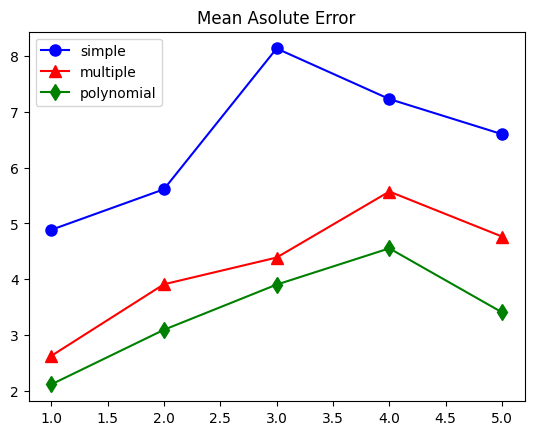

In [136]:
# 1. MAE
X= np.arange(1,k+1)
plt.plot(X,mae[0],marker='o', color='blue',markersize=8,label='simple')
plt.plot(X,mae[1],marker='^', color='red',markersize=8,label='multiple')
plt.plot(X,mae[2],marker='d', color='green',markersize=8,label='polynomial')
plt.title("Mean Asolute Error")
plt.legend()
plt.show()

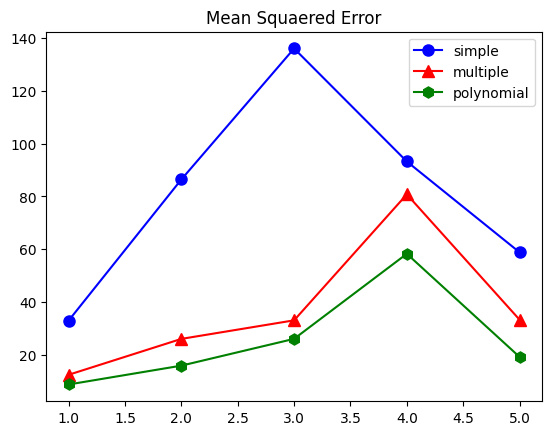

In [144]:
# 2. MSE
X= np.arange(1,k+1)
plt.plot(X,mse[0],marker='o', color='blue',markersize=8,label='simple')
plt.plot(X,mse[1],marker='^', color='red',markersize=8,label='multiple')
plt.plot(X,mse[2],marker='h', color='green',markersize=8,label='polynomial')
plt.title("Mean Squaered Error")
plt.legend()
plt.show()

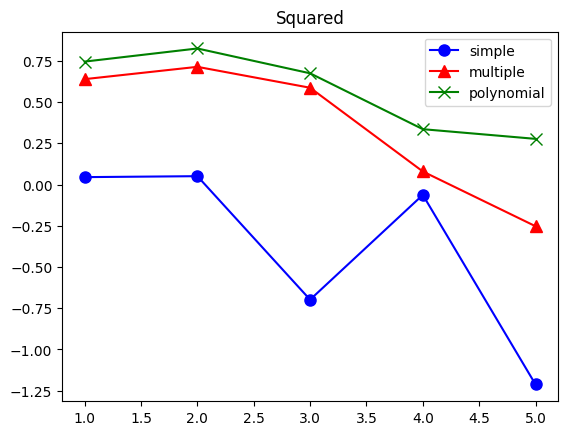

In [147]:
# 3. R2
X= np.arange(1,k+1)
plt.plot(X,r2[0],marker='o', color='blue',markersize=8,label='simple')
plt.plot(X,r2[1],marker='^', color='red',markersize=8,label='multiple')
plt.plot(X,r2[2],marker='x', color='green',markersize=8,label='polynomial')
plt.title("Squared")
plt.legend()
plt.show()